### Generate a dataset for instruction tuning

This notebook will guide you through the process of generating a dataset for instruction tuning. We'll use the `distilabel` package to generate a dataset for instruction tuning.

So let's dig in to some instruction tuning datasets.

### Exercise: Generate a dataset for instruction tuning

Now that you've seen how to generate a dataset for instruction tuning, try generating a dataset for instruction tuning.

**Difficulty Levels**

🐢 Generate an instruction tuning dataset

🐕 Generate a dataset for instruction tuning with seed data

🦁 Generate a dataset for instruction tuning with seed data and with instruction evolution


### Install dependencies

Instead of transformers, you can also install `vllm` or `hf-inference-endpoints`.

```
!pip install "distilabel[hf-transformers,outlines,instructor]"
```

In [2]:
! pip show distilabel

Name: distilabel
Version: 1.5.3
Summary: Distilabel is an AI Feedback (AIF) framework for building datasets with and for LLMs.
Home-page: 
Author: 
Author-email: Argilla <admin@argilla.io>
License-Expression: Apache-2.0
Location: /home/loc/miniconda3/envs/py3x/lib/python3.10/site-packages
Requires: datasets, httpx, jinja2, multiprocess, nest-asyncio, networkx, orjson, portalocker, pydantic, rich, scipy, setuptools, tblib, typer, universal-pathlib
Required-by: 


### Start synthesizing

As we've seen in the previous course content, we can create a distilabel pipelines for instruction dataset generation. The bare minimum pipline is already provided. Make sure to scale up this pipeline to generate a large dataset for instruction tuning. Swap out models, model providers and generation arguments to see how they affect the quality of the dataset. Experiment small, scale up later.

Check out the [distilabel components gallery](https://distilabel.argilla.io/latest/components-gallery/) for information about the processing classes and how to use them.

An example of loading data from the Hub instead of dictionaries is provided below.

```python
from datasets import load_dataset

with Pipeline(...) as pipeline:
    ...

if __name__ == "__main__:
    dataset = load_dataset("my-dataset", split="train")
    distiset = pipeline.run(dataset=dataset)
```

Don't forget to push your dataset to the Hub after running the pipeline!


In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name())

True
Tesla P40


In [2]:
from distilabel.llms import TransformersLLM
from distilabel.pipeline import Pipeline
from distilabel.steps import LoadDataFromDicts
from distilabel.steps.tasks import TextGeneration

with Pipeline() as pipeline:
    data = LoadDataFromDicts(data=[{"instruction": "Generate a short question about the Hugging Face Smol-Course."}])
    llm = TransformersLLM(model="HuggingFaceTB/SmolLM2-1.7B-Instruct")
    gen_a = TextGeneration(llm=llm, output_mappings={"generation": "instruction"})
    gen_b = TextGeneration(llm=llm, output_mappings={"generation": "response"})
    data >> gen_a >> gen_b


/tmp/ipykernel_45247/1649845250.py:1: DeprecationWarning: Importing from 'distilabel.llms' is deprecated and will be removed in a version 1.7.0. Import from 'distilabel.models' instead.
  from distilabel.llms import TransformersLLM


[03/20/25 21:29:43] INFO     ['distilabel.pipeline'] 📝 Pipeline data will be written to               ]8;id=776391;file:///home/loc/miniconda3/envs/py3x/lib/python3.10/site-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=686377;file:///home/loc/miniconda3/envs/py3x/lib/python3.10/site-packages/distilabel/pipeline/base.py#1015\1015]8;;\
                             '/home/loc/.cache/distilabel/pipelines/pipeline_load_data_from_dicts_0_te             
                             xt_generation_0_text_generation_1/c01ebfb0c402b5259a883a99a288ac77e435bd2             
                             0/executions/ba93fee5474d2e343a10a1c4b6e96bcada7c66a6/data/steps_outputs'             

                    INFO     ['distilabel.pipeline'] ⌛ The steps of the pipeline will be loaded in    ]8;id=77492;file:///home/loc/miniconda3/envs/py3x/lib/python3.10/site-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=862529;file:///home/loc/miniconda3/envs/py3x/lib/python3.10/site-packages/distilabel/pipeline/base.py#1046\1046]8;;\
                             stages:                                                                               
                              * Legend: 🚰 GeneratorStep 🌐 GlobalStep 🔄 Step                                     
                              * Stage 0:                                                                           
                                - 🚰 'load_data_from_dicts_0'                                                      
                                - 🔄 'text_generation_0'                                                           
                                - 🔄 'text_generation_1'                                                           

                    INFO     ['distilabel.pipeline'] ⏳ Waiting for all the steps of stage 0 to        ]8;id=528288;file:///home/loc/miniconda3/envs/py3x/lib/python3.10/site-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=279951;file:///home/loc/miniconda3/envs/py3x/lib/python3.10/site-packages/distilabel/pipeline/base.py#1382\1382]8;;\
                             load...                                                                               

Device set to use cuda:0
Device set to use cuda:0


[03/20/25 21:29:45] ERROR    ['distilabel.pipeline'] ❌ Failed to load step 'text_generation_1': Step  ]8;id=970203;file:///home/loc/miniconda3/envs/py3x/lib/python3.10/site-packages/distilabel/pipeline/local.py\local.py]8;;\:]8;id=517707;file:///home/loc/miniconda3/envs/py3x/lib/python3.10/site-packages/distilabel/pipeline/local.py#316\316]8;;\
                             load failed: Cannot re-initialize CUDA in forked subprocess. To use CUDA              
                             with multiprocessing, you must use the 'spawn' start method                           
                                                                                                                   
                             For further information visit                                                         
                             'https://distilabel.argilla.io/latest/api/pipeline/step_wrapper'                      

                    ERROR    ['distilabel.pipeline'] ❌ Failed to load step 'text_generation_0': Step  ]8;id=281490;file:///home/loc/miniconda3/envs/py3x/lib/python3.10/site-packages/distilabel/pipeline/local.py\local.py]8;;\:]8;id=712980;file:///home/loc/miniconda3/envs/py3x/lib/python3.10/site-packages/distilabel/pipeline/local.py#316\316]8;;\
                             load failed: Cannot re-initialize CUDA in forked subprocess. To use CUDA              
                             with multiprocessing, you must use the 'spawn' start method                           
                                                                                                                   
                             For further information visit                                                         
                             'https://distilabel.argilla.io/latest/api/pipeline/step_wrapper'                      

[03/20/25 21:29:46] ERROR    ['distilabel.pipeline'] ❌ Failed to load all the steps of stage 0        ]8;id=367740;file:///home/loc/miniconda3/envs/py3x/lib/python3.10/site-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=449366;file:///home/loc/miniconda3/envs/py3x/lib/python3.10/site-packages/distilabel/pipeline/base.py#1396\1396]8;;\

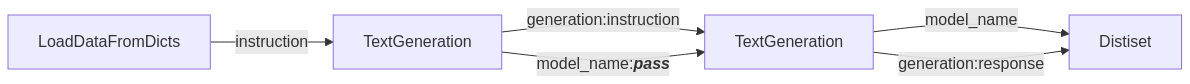

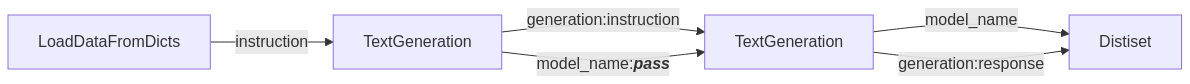

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /home/loc/miniconda3/envs/py3x/lib/python3.10/site-packages/distilabel/pipeline/step_wrapper.py: │
│ 101 in run                                                                                       │
│                                                                                                  │
│    98 │   │   """                                                                                │
│    99 │   │                                                                                      │
│   100 │   │   try:                                                                               │
│ ❱ 101 │   │   │   self.step.load()                                                               │
│   102 │   │   │   self.step._logger.debug(f"Step '{self.step.name}' loaded!")                    │
│   103 │   │   except Exception as e:                                                             │
│   104 │   │   │   self.step.unload()                                                             │
│                                                                                                  │
│ /home/loc/miniconda3/envs/py3x/lib/python3.10/site-packages/distilabel/steps/tasks/text_generati │
│ on.py:218 in load                                                                                │
│                                                                                                  │
│   215 │   │   super().model_post_init(__context)                                                 │
│   216 │                                                                                          │
│   217 │   def load(self) -> None:                                                                │
│ ❱ 218 │   │   super().load()                                                                     │
│   219 │   │                                                                                      │
│   220 │   │   for column in self.columns:                                                        │
│   221 │   │   │   check_column_in_template(column, self.template)                                │
│                                                                                                  │
│ /home/loc/miniconda3/envs/py3x/lib/python3.10/site-packages/distilabel/steps/tasks/base.py:117   │
│ in load                                                                                          │
│                                                                                                  │
│   114 │   │   """Loads the LLM via the `LLM.load()` method."""                                   │
│   115 │   │   super().load()                                                                     │
│   116 │   │   self._set_default_structured_output()                                              │
│ ❱ 117 │   │   self.llm.load()                                                                    │
│   118 │                                                                                          │
│   119 │   @override                                                                              │
│   120 │   def unload(self) -> None:                                                              │
│                                                                                                  │
│ /home/loc/miniconda3/envs/py3x/lib/python3.10/site-packages/distilabel/models/llms/huggingface/t │
│ ransformers.py:137 in load                                                                       │
│                                                                                                  │
│   134 │   │                                                                                      │
│   135 │   │   token = self.token.get_secret_value() if self.token is not None else self.token    │
│   136 │   │                                                

In [3]:
distiset = pipeline.run(use_cache=False)
#distiset.push_to_hub("huggingface-smol-course-instruction-tuning-dataset")

### 🌯 That's a wrap

You've now seen how to generate a dataset for instruction tuning. You could use this to:

- Generate a dataset for instruction tuning.
- Create evaluation datasets for instruction tuning.

Next

🧑‍🏫 Learn - About generating preference datasets 🏋️‍♂️ Fine-tune a model for instruction tuning with a synthetic dataset based on the instruction tuning chapter
